Data Analysis for Attempt 1 and Attempt 0 Code

Step 1: Imports

In [2]:
import numpy as np
import jax.numpy as jnp
from typing import List, Tuple
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

Step 2: Initialize Data as NDArray[NDArray([dim, timestep, time])]

In [3]:
import re

#Data copy-pasted from Sheets onto Google Search Bar onto VSCode and formatted into List[Tuple] using regex.

att1data = "5	5	6.25 5	7	8.7 7	5	12.3 7	7	17 5	10	12.4 7	10	24.2 10	5	24.7 10	7	34.7 10	10	49.3 5	20	25.1 5	32	39.6 10	20	99.9 20	5	96.3 20	10	192.1 20	20	386.3 10	32	153.7 32	5	245.9 32	10	500.6 10	50	246.5 10	100	489"
att1data = re.sub("\t", ",", att1data)
att1data = re.sub(" ", "),(", att1data)
att1data = f'[({att1data})]'
att1data = eval(att1data)
att1data = np.array(att1data, dtype=[('dim', int), ('step', int), ('time', float)])

att0data = "5	5	0 5	7	0 7	5	0 7	7	0 5	10	0 7	10	0 10	5	0 10	7	0 10	10	0 5	20	0 5	32	0 10	20	0 20	5	0 20	10	0.1 20	20	0.15 10	32	0.05 32	5	0.1 32	10	0.2 10	50	0.1 10	100	0.2 20	32	0.2 32	20	0.4 32	32	0.6 20	50	0.4 32	50	0.95 50	10	0.5 50	20	0.95 50	32	1.5 50	50	2.4 20	100	0.75 32	100	1.95 50	100	4.75 100	10	1.9 100	20	4.2 100	32	6.1 100	50	9.4 100	100	19.1 100	200	38.4 100	500	98.2 200	100	77.2 200	200	153.5"
att0data = re.sub("\t", ",", att0data)
att0data = re.sub(" ", "),(", att0data)
att0data = f'[({att0data})]'
att0data = eval(att0data)
att0data = np.array(att0data, dtype=[('dim', int), ('step', int), ('time', float)])

#5 7 10 20 32 50 100 200

att1datadim = np.sort(att1data, order=['dim', 'step'])
att1datastep = np.sort(att1data, order=['step', 'dim'])
att0datadim = np.sort(att0data, order=['dim', 'step'])
att0datastep = np.sort(att0data, order=['step', 'dim'])


Step 3: Visualize Data

Attempt 1 Visuals

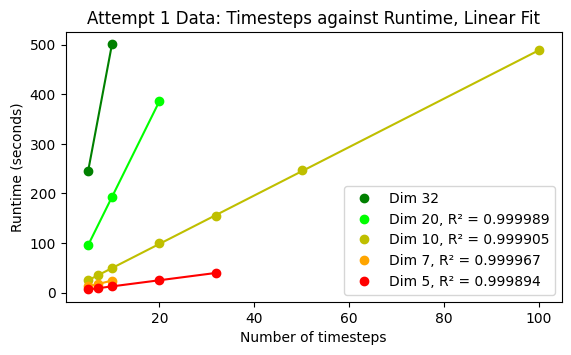

In [4]:
plt.figure().set_figheight(3.5)

dim32 = np.poly1d(np.polyfit(att1datadim[att1datadim['dim']==32]['step'], att1datadim[att1datadim['dim']==32]['time'], 1))
pdim32 = np.linspace(5, 10, 1000)
plt.plot(att1datadim[att1datadim['dim']==32]['step'], att1datadim[att1datadim['dim']==32]['time'], 'o', color='green', label=f'Dim 32')
plt.plot(pdim32, dim32(pdim32), 'green')

dim20 = np.poly1d(np.polyfit(att1datadim[att1datadim['dim']==20]['step'], att1datadim[att1datadim['dim']==20]['time'], 1))
pdim20 = np.linspace(5, 20, 1000)
d20r = r2_score(att1datadim[att1datadim['dim']==20]['time'], dim20(att1datadim[att1datadim['dim']==20]['step']))
plt.plot(att1datadim[att1datadim['dim']==20]['step'], att1datadim[att1datadim['dim']==20]['time'], 'o', color='lime', label=f'Dim 20, R² = {d20r:.6f}')
plt.plot(pdim20, dim20(pdim20), 'lime')

dim10 = np.poly1d(np.polyfit(att1datadim[att1datadim['dim']==10]['step'], att1datadim[att1datadim['dim']==10]['time'], 1))
pdim10 = np.linspace(5, 100, 1000)
d10r = r2_score(att1datadim[att1datadim['dim']==10]['time'], dim10(att1datadim[att1datadim['dim']==10]['step']))
plt.plot(att1datadim[att1datadim['dim']==10]['step'], att1datadim[att1datadim['dim']==10]['time'], 'o', color='y', label=f'Dim 10, R² = {d10r:.6f}')
plt.plot(pdim10, dim10(pdim10), 'y')

dim7 = np.poly1d(np.polyfit(att1datadim[att1datadim['dim']==7]['step'], att1datadim[att1datadim['dim']==7]['time'], 1))
pdim7 = np.linspace(5, 10, 1000)
d7r = r2_score(att1datadim[att1datadim['dim']==7]['time'], dim7(att1datadim[att1datadim['dim']==7]['step']))
plt.plot(att1datadim[att1datadim['dim']==7]['step'], att1datadim[att1datadim['dim']==7]['time'], 'o', color='orange', label=f'Dim 7, R² = {d7r:.6f}')
plt.plot(pdim7, dim7(pdim7), 'orange')

dim5 = np.poly1d(np.polyfit(att1datadim[att1datadim['dim']==5]['step'], att1datadim[att1datadim['dim']==5]['time'], 1))
pdim5 = np.linspace(5, 32, 1000)
d5r = r2_score(att1datadim[att1datadim['dim']==5]['time'], dim5(att1datadim[att1datadim['dim']==5]['step']))
plt.plot(att1datadim[att1datadim['dim']==5]['step'], att1datadim[att1datadim['dim']==5]['time'], 'o', color='red', label=f'Dim 5, R² = {d5r:.6f}')
plt.plot(pdim5, dim5(pdim5), 'red')

plt.legend()
plt.xlabel(f"Number of timesteps")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 1 Data: Timesteps against Runtime, Linear Fit")
plt.show()

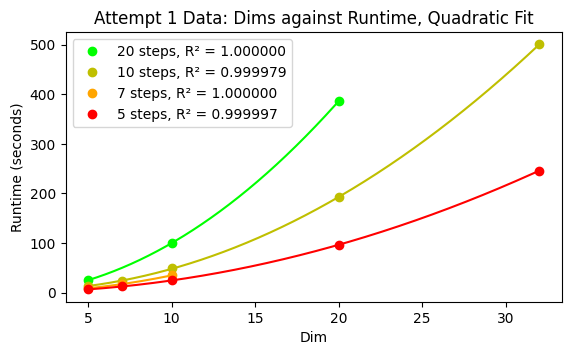

In [5]:
plt.figure().set_figheight(3.5)

step20 = np.poly1d(np.polyfit(att1datastep[att1datastep['step']==20]['dim'], att1datastep[att1datastep['step']==20]['time'], 2))
pstep20 = np.linspace(5, 20, 1000)
s20r = r2_score(att1datastep[att1datastep['step']==20]['time'], step20(att1datastep[att1datastep['step']==20]['dim']))
plt.plot(att1datastep[att1datastep['step']==20]['dim'], att1datastep[att1datastep['step']==20]['time'], 'o', color='lime', label=f'20 steps, R² = {s20r:.6f}')
plt.plot(pstep20, step20(pstep20), 'lime')

step10 = np.poly1d(np.polyfit(att1datastep[att1datastep['step']==10]['dim'], att1datastep[att1datastep['step']==10]['time'], 2))
pstep10 = np.linspace(5, 32, 1000)
s10r = r2_score(att1datastep[att1datastep['step']==10]['time'], step10(att1datastep[att1datastep['step']==10]['dim']))
plt.plot(att1datastep[att1datastep['step']==10]['dim'], att1datastep[att1datastep['step']==10]['time'], 'o', color='y', label=f'10 steps, R² = {s10r:.6f}')
plt.plot(pstep10, step10(pstep10), 'y')

step7 = np.poly1d(np.polyfit(att1datastep[att1datastep['step']==7]['dim'], att1datastep[att1datastep['step']==7]['time'], 2))
pstep7 = np.linspace(5, 10, 1000)
s7r = r2_score(att1datastep[att1datastep['step']==7]['time'], step7(att1datastep[att1datastep['step']==7]['dim']))
plt.plot(att1datastep[att1datastep['step']==7]['dim'], att1datastep[att1datastep['step']==7]['time'], 'o', color='orange', label=f'7 steps, R² = {s7r:.6f}')
plt.plot(pstep7, step7(pstep7), 'orange')

step5 = np.poly1d(np.polyfit(att1datastep[att1datastep['step']==5]['dim'], att1datastep[att1datastep['step']==5]['time'], 2))
pstep5 = np.linspace(5, 32, 1000)
s5r = r2_score(att1datastep[att1datastep['step']==5]['time'], step5(att1datastep[att1datastep['step']==5]['dim']))
plt.plot(att1datastep[att1datastep['step']==5]['dim'], att1datastep[att1datastep['step']==5]['time'], 'o', color='red', label=f'5 steps, R² = {s5r:.6f}')
plt.plot(pstep5, step5(pstep5), 'red')

plt.legend()
plt.xlabel(f"Dim")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 1 Data: Dims against Runtime, Quadratic Fit")
plt.show()


Attempt 0 Visuals

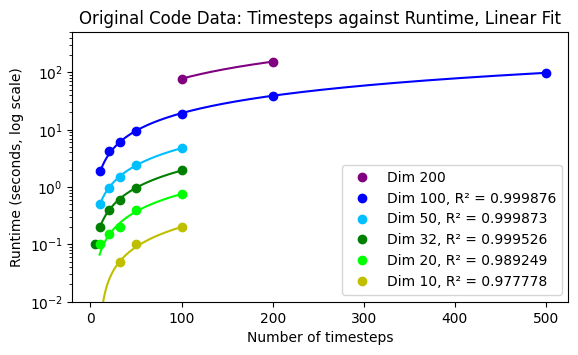

In [6]:
plt.figure().set_figheight(3.5)

dim200 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==200]['step'], att0datadim[att0datadim['dim']==200]['time'], 1))
pdim200 = np.linspace(100, 200, 1000)
plt.plot(att0datadim[att0datadim['dim']==200]['step'], att0datadim[att0datadim['dim']==200]['time'], 'o', color='purple', label=f'Dim 200')
plt.plot(pdim200, dim200(pdim200), 'purple')

dim100 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==100]['step'], att0datadim[att0datadim['dim']==100]['time'], 1))
pdim100 = np.linspace(10, 500, 1000)
d100r = r2_score(att0datadim[att0datadim['dim']==100]['time'], dim100(att0datadim[att0datadim['dim']==100]['step']))
plt.plot(att0datadim[att0datadim['dim']==100]['step'], att0datadim[att0datadim['dim']==100]['time'], 'o', color='blue', label=f'Dim 100, R² = {d100r:.6f}')
plt.plot(pdim100, dim100(pdim100), 'blue')

dim50 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==50]['step'], att0datadim[att0datadim['dim']==50]['time'], 1))
pdim50 = np.linspace(10, 100, 1000)
d50r = r2_score(att0datadim[att0datadim['dim']==50]['time'], dim50(att0datadim[att0datadim['dim']==50]['step']))
plt.plot(att0datadim[att0datadim['dim']==50]['step'], att0datadim[att0datadim['dim']==50]['time'], 'o', color='deepskyblue', label=f'Dim 50, R² = {d50r:.6f}')
plt.plot(pdim50, dim50(pdim50), 'deepskyblue')

dim32 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==32]['step'], att0datadim[att0datadim['dim']==32]['time'], 1))
pdim32 = np.linspace(10, 100, 1000)
d32r = r2_score(att0datadim[att0datadim['dim']==32]['time'], dim32(att0datadim[att0datadim['dim']==32]['step']))
plt.plot(att0datadim[att0datadim['dim']==32]['step'], att0datadim[att0datadim['dim']==32]['time'], 'o', color='green', label=f'Dim 32, R² = {d32r:.6f}')
plt.plot(pdim32, dim32(pdim32), 'green')

dim20 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==20]['step'], att0datadim[att0datadim['dim']==20]['time'], 1))
pdim20 = np.linspace(10, 100, 1000)
d20r = r2_score(att0datadim[att0datadim['dim']==20]['time'], dim20(att0datadim[att0datadim['dim']==20]['step']))
plt.plot(att0datadim[att0datadim['dim']==20]['step'], att0datadim[att0datadim['dim']==20]['time'], 'o', color='lime', label=f'Dim 20, R² = {d20r:.6f}')
plt.plot(pdim20, dim20(pdim20), 'lime')

dim10 = np.poly1d(np.polyfit(att0datadim[att0datadim['dim']==10]['step'], att0datadim[att0datadim['dim']==10]['time'], 1))
pdim10 = np.linspace(5, 100, 1000)
d10r = r2_score(att0datadim[att0datadim['dim']==10]['time'], dim10(att0datadim[att0datadim['dim']==10]['step']))
plt.plot(att0datadim[att0datadim['dim']==10]['step'], att0datadim[att0datadim['dim']==10]['time'], 'o', color='y', label=f'Dim 10, R² = {d10r:.6f}')
plt.plot(pdim10, dim10(pdim10), 'y')


plt.legend()
plt.xlabel(f"Number of timesteps")
plt.ylabel("Runtime (seconds, log scale)")
plt.yscale('log')
plt.ylim(0.01, 500)
plt.title("Original Code Data: Timesteps against Runtime, Linear Fit")
plt.show()

C:\Users\LAMM\AppData\Local\Temp\ipykernel_38888\3294201729.py:3: RankWarning: Polyfit may be poorly conditioned
  step200 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==200]['dim'], att0datastep[att0datastep['step']==200]['time'], 2))


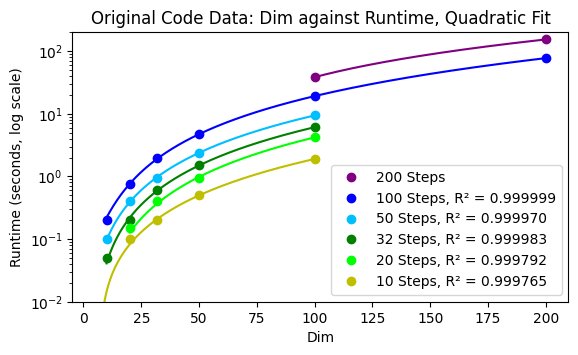

In [7]:
plt.figure().set_figheight(3.5)

step200 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==200]['dim'], att0datastep[att0datastep['step']==200]['time'], 2))
pstep200 = np.linspace(100, 200, 1000)
plt.plot(att0datastep[att0datastep['step']==200]['dim'], att0datastep[att0datastep['step']==200]['time'], 'o', color='purple', label=f'200 Steps')
plt.plot(pstep200, step200(pstep200), 'purple')

step100 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==100]['dim'], att0datastep[att0datastep['step']==100]['time'], 2))
pstep100 = np.linspace(10, 200, 1000)
s100r = r2_score(att0datastep[att0datastep['step']==100]['time'], step100(att0datastep[att0datastep['step']==100]['dim']))
plt.plot(att0datastep[att0datastep['step']==100]['dim'], att0datastep[att0datastep['step']==100]['time'], 'o', color='blue', label=f'100 Steps, R² = {s100r:.6f}')
plt.plot(pstep100, step100(pstep100), 'blue')

step50 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==50]['dim'], att0datastep[att0datastep['step']==50]['time'], 2))
pstep50 = np.linspace(10, 100, 1000)
s50r = r2_score(att0datastep[att0datastep['step']==50]['time'], step50(att0datastep[att0datastep['step']==50]['dim']))
plt.plot(att0datastep[att0datastep['step']==50]['dim'], att0datastep[att0datastep['step']==50]['time'], 'o', color='deepskyblue', label=f'50 Steps, R² = {s50r:.6f}')
plt.plot(pstep50, step50(pstep50), 'deepskyblue')

step32 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==32]['dim'], att0datastep[att0datastep['step']==32]['time'], 2))
pstep32 = np.linspace(10, 100, 1000)
s32r = r2_score(att0datastep[att0datastep['step']==32]['time'], step32(att0datastep[att0datastep['step']==32]['dim']))
plt.plot(att0datastep[att0datastep['step']==32]['dim'], att0datastep[att0datastep['step']==32]['time'], 'o', color='green', label=f'32 Steps, R² = {s32r:.6f}')
plt.plot(pstep32, step32(pstep32), 'green')

step20 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==20]['dim'], att0datastep[att0datastep['step']==20]['time'], 2))
pstep20 = np.linspace(20, 100, 1000)
s20r = r2_score(att0datastep[att0datastep['step']==20]['time'], step20(att0datastep[att0datastep['step']==20]['dim']))
plt.plot(att0datastep[att0datastep['step']==20]['dim'], att0datastep[att0datastep['step']==20]['time'], 'o', color='lime', label=f'20 Steps, R² = {s20r:.6f}')
plt.plot(pstep20, step20(pstep20), 'lime')

step10 = np.poly1d(np.polyfit(att0datastep[att0datastep['step']==10]['dim'], att0datastep[att0datastep['step']==10]['time'], 2))
pstep10 = np.linspace(5, 100, 1000)
s10r = r2_score(att0datastep[att0datastep['step']==10]['time'], step10(att0datastep[att0datastep['step']==10]['dim']))
plt.plot(att0datastep[att0datastep['step']==10]['dim'], att0datastep[att0datastep['step']==10]['time'], 'o', color='y', label=f'10 Steps, R² = {s10r:.6f}')
plt.plot(pstep10, step10(pstep10), 'y')


plt.legend()
plt.xlabel(f"Dim")
plt.ylabel("Runtime (seconds, log scale)")
plt.title("Original Code Data: Dim against Runtime, Quadratic Fit")
plt.yscale('log')
plt.ylim(0.01, 200)
plt.show()

